## <img src ='Pic\logo.jpg' width='700px'>


<div align="center">

# KHÓA HỌC: LẬP TRÌNH PYTHON CƠ BẢN

</div>

-----
Bài 6 - Phân tích và xử lý dữ liệu với Pandas - Phần 01
----
Giảng Viên: Đặng Văn Nam

Email: namdv@aiacademy.edu.vn

**NỘI DUNG BÀI 6:**
1. Giới thiệu Pandas
2. Tạo đối tượng cơ bản trong Pandas
    * Series
    * Dataframe
3. Đọc dữ liệu từ các nguồn khác nhau
4. Quan sát và truy xuất dữ liệu trong DataFrame 
5. Replacing Values, Rename Columns
6. Lọc dữ liệu trong DataFrame
7. Xác định các tham số thống kê: Sum, Cumsum, Min, Max, Mean, Median, Std
8. Giá trị duy nhất (Unique)
9. Phân tích dữ liệu chuỗi thời gian (Time series data)

# 1) Giới thiệu
---
**Pandas** là một thư viện mã nguồn mở được xây dựng dựa trên NumPy, sử dụng để thao tác và phân tích dữ liệu. Với Pandas chúng ta có thể:
Xử lý tập dữ liệu khác nhau về định dạng: chuỗi thời gian, bảng không đồng nhất, ma trận dữ liệu
* Import dữ liệu từ nhiều nguồn khác nhau như CSV, DB/SQL…
* Xử lý vô số phép toán cho tập dữ liệu: subsetting, slicing, filtering, merging, groupBy, re-ordering, and re-shaping,..
* Xử lý dữ liệu mất mát theo mong muốn.
* Xử lý, phân tích dữ liệu tốt như mô hình hoá và thống kê.
* Tích hợp tốt với các thư viện khác của python.

https://pandas.pydata.org/

In [1]:
#Kiểm tra phiên bản của thư viện Pandas
import pandas as pd
print('Version Pandas: ',pd.__version__)

Version Pandas:  1.4.2


# 2) Làm việc với các đối tượng trong Pandas
---
## 2.1) Series

**Series** là mảng một chiều (1D) giống như kiểu vector trong Numpy, hay như một cột của một bảng, nhưng nó bao gồm thêm một bảng đánh index.

In [2]:
#Khai báo sử dụng thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Tạo một đối tượng series
#index mặc định đánh số từ 0
data = pd.Series([2.8, 3, 4.44, 5])
data

0    2.80
1    3.00
2    4.44
3    5.00
dtype: float64

In [4]:
#Mỗi một đối tượng series bao gồm 2 thành phần
#1. Values
#2. index
print('Values:', data.values)
print('Indices:', data.index)

Values: [2.8  3.   4.44 5.  ]
Indices: RangeIndex(start=0, stop=4, step=1)


In [5]:
#Tạo một đối tượng series với index thiết lập
data = pd.Series([1.25, 2, 3.5, 4.75, 8.0],
                 index=['a', 'b', 'c', 'd','k'])
data

a    1.25
b    2.00
c    3.50
d    4.75
k    8.00
dtype: float64

In [6]:
print('Values:', data.values)
print('Indices:', data.index)

Values: [1.25 2.   3.5  4.75 8.  ]
Indices: Index(['a', 'b', 'c', 'd', 'k'], dtype='object')


In [7]:
#Truy cập tới một phần tử trong series thông qua index hoặc thứ tự
print('Phần tử có index = b:', data['b'])
print('Phần tử ở vị trí 1  :', data[1])

Phần tử có index = b: 2.0
Phần tử ở vị trí 1  : 2.0


In [8]:
#Tạo đối tượng series từ một biến kiểu Dictionary
#Chỉ số được tự động sắp xếp.
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict,name='Population_USA')
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: Population_USA, dtype: int64

In [9]:
#View tên của series
population.name

'Population_USA'

In [10]:
population['Florida']

19552860

In [11]:
#Chuyển đổi từ dữ liệu vector sang series
a_vector = np.array([8,12,9,0,7,11])

a_series = pd.Series(a_vector,dtype='float')
a_series


0     8.0
1    12.0
2     9.0
3     0.0
4     7.0
5    11.0
dtype: float64

## 2.2) DataFrame
---

In [12]:
#Tạo DataFrame từ các Series
area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995}
area = pd.Series(area_dict, name='Area_USA')
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area_USA, dtype: int64

In [13]:
data_usa = pd.DataFrame({'population':population,
                         'area':area})
data_usa

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [14]:
#Tương tự như series, DataFrame cũng có thuộc tính values và index
df_values = data_usa.values
df_index = data_usa.index
print('Values of DataFrame:\n',df_values)
print('Index of DataFrame:\n',df_index)

Values of DataFrame:
 [[38332521   423967]
 [26448193   695662]
 [19651127   141297]
 [19552860   170312]
 [12882135   149995]]
Index of DataFrame:
 Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')


In [15]:
#Tạo một DataFrame từ một biến Dict
#Chỉ số được tạo mặc định từ 0
data_dict = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]}

purchases = pd.DataFrame(data_dict)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [16]:
#Tạo DataFrame với index thiết lập
purchases = pd.DataFrame(data_dict, 
                         index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


# 3) Đọc dữ liệu từ các nguồn khác nhau (CSV, Text, Excel)
---
## 3.1) Đọc file CSV, Text
* CSV là một định dạng dữ liệu văn bản đơn giản có tên đầy đủ là Comma Separated Values. Với định dạng CSV này, các giá trị được chia tách với nhau bởi các dấu phẩy. Định dạng CSV phổ biến bởi vì chúng có tính tương thích cao, dễ dàng di chuyển từ phần mềm này sang phần mềm khác để sử dụng mà không lo gặp các xung đột.

* Tài liệu CSV cũng làm một trong những tài liệu phổ biến trên thế giới với khả năng lưu trữ nhỏ nhẹ.


In [17]:
import pandas as pd
path = 'Data_Excercise\csv_Data_BMI.csv'
#Sử dụng phương thức read_csv
data = pd.read_csv(path)
#Hiển thị thông tin biến Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Personal   500 non-null    object
 1   Gender     500 non-null    object
 2   Height_cm  500 non-null    int64 
 3   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [18]:
data

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
2,P3,Female,185,110
3,P4,Female,195,104
4,P5,Male,149,61
...,...,...,...,...
495,P496,Female,150,153
496,P497,Female,184,121
497,P498,Female,141,136
498,P499,Male,150,95


In [19]:
#VÍ DỤ 1:
#Sử dụng phương thức read_csv()
#Tham số: Thiết lập cột index là cột Personal
data1 = pd.read_csv(path,
                    index_col=0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, P1 to P500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     500 non-null    object
 1   Height_cm  500 non-null    int64 
 2   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [20]:
data1.head()

,Gender,Height_cm,Weight_kg
Personal,,,
P1,Male,174,96
P2,Male,189,87
P3,Female,185,110
P4,Female,195,104
P5,Male,149,61


In [21]:
#VÍ DỤ 2:
#Sử dụng phương thức read_csv()
#Thiết lập số hàng, cột muốn đọc dữ liệu
data2 = pd.read_csv(path,
                    nrows=100,
                    usecols=['Height_cm', 'Weight_kg'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height_cm  100 non-null    int64
 1   Weight_kg  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [22]:
data2.tail()

,Height_cm,Weight_kg
95,170,156
96,142,69
97,160,139
98,195,69
99,190,50


In [23]:
#VÍ DỤ 3:
#Thiết lập tham số đọc dữ liệu từ dòng thứ 5 trong file
#và đặt lại tên của các cột dữ liệu
data3 = pd.read_csv(path,
                    names=['ID','Sex','H(cm)','W(kg)'],
                    skiprows=5)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      496 non-null    object
 1   Sex     496 non-null    object
 2   H(cm)   496 non-null    int64 
 3   W(kg)   496 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.6+ KB


In [24]:
data3.head()

,ID,Sex,H(cm),W(kg)
0,P5,Male,149,61
1,P6,Male,189,104
2,P7,Male,147,92
3,P8,Male,154,111
4,P9,Male,174,90


#### Đọc dữ liệu từ file Text
---

In [27]:
#Đọc dữ liệu trong file txt_Diem_2A.txt:
df_diem2a = pd.read_csv('Data_Excercise/txt_Data_Diem_2A.txt',
                     names=['HS1','HS2','HS3','HS4','HS5','HS6','HS7','HS8','HS9','HS10',
                            'HS11','HS12','HS13','HS14','HS15','HS16','HS17','HS18','HS19','HS20',
                            'HS21','HS22','HS23','HS24','HS25','HS26','HS27','HS28','HS29','HS30'],
                     header=None)
                    
df_diem2a

,HS1,HS2,HS3,HS4,HS5,HS6,HS7,HS8,HS9,HS10,...,HS21,HS22,HS23,HS24,HS25,HS26,HS27,HS28,HS29,HS30
0,2,4,3,7,5,6,5,6,8,9,...,1,6,5,1,4,6,7,1,1,1
1,3,5,3,10,9,1,9,8,3,1,...,1,6,1,6,3,0,2,2,1,6
2,1,10,4,9,6,9,0,2,3,1,...,4,1,7,3,8,9,8,9,9,9
3,6,3,0,8,3,7,7,2,6,8,...,4,6,8,6,6,10,3,1,4,5
4,4,3,6,7,4,5,2,6,9,4,...,0,5,3,1,4,5,6,8,2,3
5,2,3,8,10,4,5,9,5,4,7,...,4,7,3,5,9,5,7,5,8,1
6,9,9,1,10,9,9,5,9,6,3,...,8,4,5,4,9,6,7,2,9,2
7,8,8,7,8,6,7,7,8,6,7,...,8,7,8,8,8,6,8,7,7,8
8,6,7,8,9,10,9,2,2,6,1,...,8,8,8,6,6,8,7,3,8,1
9,7,8,7,8,6,10,10,6,8,10,...,9,9,8,7,7,7,10,8,9,7


In [26]:
df_diem2a = pd.read_csv('Data_Excercise/txt_Data_Diem_2A.txt')
#                      names=['HS1','HS2','HS3','HS4','HS5','HS6','HS7','HS8','HS9','HS10',
#                             'HS11','HS12','HS13','HS14','HS15','HS16','HS17','HS18','HS19','HS20',
#                             'HS21','HS22','HS23','HS24','HS25','HS26','HS27','HS28','HS29','HS30'],
#                      header=None)
                    
df_diem2a

,2,4,3,7,5,6,5.1,6.1,8,9,...,1.1,6.3,5.3,1.2,4.1,6.4,7.2,1.3,1.4,1.5
0,3,5,3,10,9,1,9,8,3,1,...,1,6,1,6,3,0,2,2,1,6
1,1,10,4,9,6,9,0,2,3,1,...,4,1,7,3,8,9,8,9,9,9
2,6,3,0,8,3,7,7,2,6,8,...,4,6,8,6,6,10,3,1,4,5
3,4,3,6,7,4,5,2,6,9,4,...,0,5,3,1,4,5,6,8,2,3
4,2,3,8,10,4,5,9,5,4,7,...,4,7,3,5,9,5,7,5,8,1
5,9,9,1,10,9,9,5,9,6,3,...,8,4,5,4,9,6,7,2,9,2
6,8,8,7,8,6,7,7,8,6,7,...,8,7,8,8,8,6,8,7,7,8
7,6,7,8,9,10,9,2,2,6,1,...,8,8,8,6,6,8,7,3,8,1
8,7,8,7,8,6,10,10,6,8,10,...,9,9,8,7,7,7,10,8,9,7


In [30]:
#Đọc dữ liệu trong file txt_Data_Diamonds.txt:
df_Diamonds = pd.read_csv('Data_Excercise/txt_Data_Diamonds.txt',
                     names=['Weight(carat)','Price(USD)'],
                     sep='\t', #mặc định sep=','
                     header=None)
                    
df_Diamonds

,Weight(carat),Price(USD)
0,0.23,484
1,0.31,942
2,0.20,345
3,1.02,4459
4,1.63,14022
5,1.14,4212
6,2.01,11925
7,1.28,9548
8,1.70,11605
9,1.01,4642


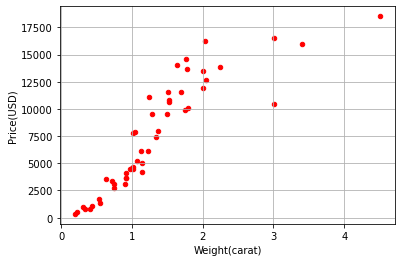

In [31]:
import matplotlib.pyplot as plt
df_Diamonds.plot.scatter(x='Weight(carat)',y='Price(USD)',color='red')
plt.grid(True)
plt.show()

## THỰC HÀNH SỐ 1
---
**Yêu cầu 1.1: Học viên đọc dữ liệu dạng CSV lưu trong file Data_Loan.csv với các tham số mặc định, cho biết các thông tin cơ bản của file**

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}








**Yêu cầu 1.2: Đọc dữ liệu từ file Data_Loan.CSV vào 2 biến DataFrame tương ứng**
1. df_number: Chỉ chứa các cột dữ liệu số
2. df_object: Chỉ chứa các cột dữ liệu Object

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}







**Yêu cầu 1.3: Đọc dữ liệu nhiệt độ của 6 thành phố [Hà Nội, Vinh, Đà Nẵng, Nha Trang, TP Hồ Chí Minh, Cà Mau] từ file txt_Data_Temp.txt vào biến DataFrame tương ứng**


In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}







## 3.2) Đọc file Excel
---

In [32]:
import pandas as pd
path_excel = 'Data_Excercise\excel_Data_Point.xlsx'
#Đọc dữ liệu từ file excel
data_ex = pd.read_excel(path_excel)
data_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STT        66 non-null     int64  
 1   Mã SV      66 non-null     int64  
 2   Họ         66 non-null     object 
 3   Tên        66 non-null     object 
 4   Ngày sinh  66 non-null     object 
 5   Tên Lớp    66 non-null     object 
 6   A          66 non-null     float64
 7   B1         66 non-null     float64
 8   B2         66 non-null     float64
 9   C1         66 non-null     float64
 10  C2         66 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 5.8+ KB


In [33]:
#VÍ DỤ 1:
#Đọc dữ liệu tại sheet đầu tiên, 
#Chỉ lấy dữ liệu cột Mã SV và các cột điểm 
#Thiết lập cột đầu tiên làm index
data_ex1 = pd.read_excel(path_excel,
                        sheet_name='4080130_01',
                        usecols=[1,6,7,8,9,10],
                        index_col=0)
data_ex1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 1621050322 to 1621050013
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       66 non-null     float64
 1   B1      66 non-null     float64
 2   B2      66 non-null     float64
 3   C1      66 non-null     float64
 4   C2      66 non-null     float64
dtypes: float64(5)
memory usage: 3.1 KB


In [34]:
data_ex1.head()

,A,B1,B2,C1,C2
Mã SV,,,,,
1621050322,8.0,0.0,5.0,7.5,8.0
1621050512,6.0,3.0,7.5,8.5,9.0
1621050211,6.7,4.0,6.5,3.0,5.0
1621050827,8.0,6.5,8.0,10.0,9.0
1621050298,7.0,5.0,8.0,8.5,9.0


In [35]:
#VÍ DỤ 2:
#Đọc dữ liệu tại sheet 2, 
#Trường hợp: sử dụng các tham số mặc định
data_ex2 = pd.read_excel(path_excel,
                        sheet_name=1)
data_ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Cộng Hòa Xã Hội Chủ Nghĩa Việt Nam  45 non-null     object
 1   Unnamed: 1                          40 non-null     object
 2   Unnamed: 2                          40 non-null     object
 3   Unnamed: 3                          40 non-null     object
 4   Unnamed: 4                          42 non-null     object
 5   Unnamed: 5                          40 non-null     object
 6   Unnamed: 6                          40 non-null     object
 7   Unnamed: 7                          40 non-null     object
 8   Unnamed: 8                          40 non-null     object
 9   Unnamed: 9                          40 non-null     object
 10  Unnamed: 10                         40 non-null     object
dtypes: object(11)
memory usage: 4.2+ KB


In [36]:
data_ex2.head(10)

,Cộng Hòa Xã Hội Chủ Nghĩa Việt Nam,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Độc lập - Tự do - Hạnh phúc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BẢNG GHI ĐIỂM CHUYÊN CẦN VÀ KIỂM TRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Học kỳ 2 - Năm học 2019-2020 (1A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tên môn học: An toàn và Bảo mật TT,NaN,NaN,NaN,Mã môn học/ mã nhóm: 4080130/02,NaN,NaN,NaN,NaN,NaN,NaN
6,Tên Giảng viên: Đặng Văn Nam,NaN,NaN,NaN,Mã Giảng viên: 0805-08,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,STT,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
9,1,1621050193,Đặng Đình,An,15/02/1998,DCCTPM61_1,7,6.5,7.5,7,8


In [37]:
#VÍ DỤ 3:
#Đọc dữ liệu tại sheet '4080130_02',từ dòng 9
data_ex3 = pd.read_excel(path_excel,
                         sheet_name='4080130_02',
                         skiprows=9)
data_ex3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STT        39 non-null     int64  
 1   Mã SV      39 non-null     int64  
 2   Họ         39 non-null     object 
 3   Tên        39 non-null     object 
 4   Ngày sinh  39 non-null     object 
 5   Tên Lớp    39 non-null     object 
 6   A          39 non-null     float64
 7   B1         39 non-null     float64
 8   B2         39 non-null     float64
 9   C1         39 non-null     float64
 10  C2         39 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 3.5+ KB


In [38]:
data_ex3.head()

,STT,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
0,1,1621050193,Đặng Đình,An,15/02/1998,DCCTPM61_1,7.0,6.5,7.5,7.0,8.0
1,2,1621070195,Mai Việt,Anh,01/09/1998,DCCTPM62A,8.0,6.5,6.0,5.0,6.0
2,3,1721050524,Nguyễn Thị,Anh,18/05/1999,DCCTPM62A,7.7,6.0,7.5,8.5,9.0
3,4,1621050484,Phạm Tuấn,Anh,27/10/1998,DCCTPM61_1,6.3,3.0,5.0,0.0,5.0
4,5,1621050260,Phan Tuấn,Anh,20/05/1998,DCCTPM61_1,7.7,6.5,7.0,10.0,9.0


In [39]:
#VÍ DỤ 4
#Đọc dữ liệu từ sheet: '4080130_03'
#Dữ liệu không chứa dòng header
data_ex4 = pd.read_excel(path_excel,
                         sheet_name=2)
data_ex4.head()

,1,1621050041,Đào Tuấn,Anh,22/10/1998,DCCTPM61_1,6.7,9,5.5,8.5,8
0,2,1621050262,Vũ Thị Lan,Anh,26/09/1998,DCCTPM61_1,6.7,7.0,9.0,8.5,6.0
1,3,1621050083,Trịnh Như,Bình,06/04/1998,DCCTPM61_1,7.3,8.5,9.5,10.0,9.0
2,4,1621050113,Trần Văn,Cương,19/06/1998,DCCTPM61_1,5.7,5.0,6.0,10.0,5.0
3,5,1621050384,Nguyễn Sỹ,Dũng,02/10/1998,DCCTPM61_1,7.0,0.0,7.5,8.5,9.0
4,6,1721050001,Trần Thị Mỹ,Duyên,15/04/1999,DCCTPM62D,6.7,7.0,7.0,10.0,9.0


In [40]:
data_ex4.head()

,1,1621050041,Đào Tuấn,Anh,22/10/1998,DCCTPM61_1,6.7,9,5.5,8.5,8
0,2,1621050262,Vũ Thị Lan,Anh,26/09/1998,DCCTPM61_1,6.7,7.0,9.0,8.5,6.0
1,3,1621050083,Trịnh Như,Bình,06/04/1998,DCCTPM61_1,7.3,8.5,9.5,10.0,9.0
2,4,1621050113,Trần Văn,Cương,19/06/1998,DCCTPM61_1,5.7,5.0,6.0,10.0,5.0
3,5,1621050384,Nguyễn Sỹ,Dũng,02/10/1998,DCCTPM61_1,7.0,0.0,7.5,8.5,9.0
4,6,1721050001,Trần Thị Mỹ,Duyên,15/04/1999,DCCTPM62D,6.7,7.0,7.0,10.0,9.0


In [45]:
data_ex4 = pd.read_excel(path_excel,
                         sheet_name=2,
                         header=None)
data_ex4.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1621050041,Đào Tuấn,Anh,22/10/1998,DCCTPM61_1,6.7,9.0,5.5,8.5,8.0
1,2,1621050262,Vũ Thị Lan,Anh,26/09/1998,DCCTPM61_1,6.7,7.0,9.0,8.5,6.0
2,3,1621050083,Trịnh Như,Bình,06/04/1998,DCCTPM61_1,7.3,8.5,9.5,10.0,9.0
3,4,1621050113,Trần Văn,Cương,19/06/1998,DCCTPM61_1,5.7,5.0,6.0,10.0,5.0
4,5,1621050384,Nguyễn Sỹ,Dũng,02/10/1998,DCCTPM61_1,7.0,0.0,7.5,8.5,9.0


In [55]:
#Ví dụ 4.1
#Đọc dữ liệu từ sheet: '4080130_03'
#Dữ liệu không chứa dòng header
#Đặt tên cho các cột
data_ex41 = pd.read_excel(path_excel,
                        sheet_name='4080130_03',
                        header=None,
                        usecols=[1,6,7,8,9,10],
                        names=['Mã SV','A','B1','B2','C1','C2'],
                        index_col=0
                        )
data_ex41.head()

,A,B1,B2,C1,C2
Mã SV,,,,,
1621050041,6.7,9.0,5.5,8.5,8.0
1621050262,6.7,7.0,9.0,8.5,6.0
1621050083,7.3,8.5,9.5,10.0,9.0
1621050113,5.7,5.0,6.0,10.0,5.0
1621050384,7.0,0.0,7.5,8.5,9.0


## THỰC HÀNH 3.2
--- 
Yêu cầu: Học viên đọc dữ liệu dạng excel lưu trong file excel_Data_Movies.xls theo từng sheet

In [ ]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}






# 4) Quan sát và truy suất dữ liệu từ DataFrame
---
## 4.1) Quan sát dữ liệu

In [56]:
#Đọc dữ liệu mẫu được lưu trữ trong file csv
path='Data_Excercise\csv_Data_Loan.csv'
df_loan=pd.read_csv(path)
df_loan

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113675,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
113676,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
113677,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
113678,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified


In [57]:
#Quan sát dữ liệu biến DataFrame
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113680 entries, 0 to 113679
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              113680 non-null  int64  
 1   term                   113680 non-null  object 
 2   int_rate               113680 non-null  float64
 3   emp_length             109924 non-null  float64
 4   home_ownership         113680 non-null  object 
 5   annual_inc             113676 non-null  float64
 6   purpose                113680 non-null  object 
 7   addr_state             113680 non-null  object 
 8   dti                    113680 non-null  float64
 9   delinq_2yrs            113651 non-null  float64
 10  revol_util             113531 non-null  float64
 11  total_acc              113651 non-null  float64
 12  bad_loan               113680 non-null  int64  
 13  longest_credit_length  113651 non-null  float64
 14  verification_status    113680 non-nu

In [58]:
#Hiển thị 10 dòng đầu tiên
df_loan.head(12)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
5,3000,36 months,18.64,9.0,RENT,48000.0,car,CA,5.35,0.0,87.5,4.0,0,4.0,verified
6,5600,60 months,21.28,4.0,OWN,40000.0,small_business,CA,5.55,0.0,32.6,13.0,1,7.0,verified
7,5375,60 months,12.69,0.0,RENT,15000.0,other,TX,18.08,0.0,36.5,3.0,1,7.0,verified
8,6500,60 months,14.65,5.0,OWN,72000.0,debt_consolidation,AZ,16.12,0.0,20.6,23.0,0,13.0,not verified
9,12000,36 months,12.69,10.0,OWN,75000.0,debt_consolidation,CA,10.78,0.0,67.1,34.0,0,22.0,verified


In [59]:
#Hiển thị 5 dòng cuối cùng của biến df_loan
df_loan.tail()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
113675,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified
113676,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified
113677,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified
113678,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified
113679,17000,60 months,15.99,10.0,MORTGAGE,63078.0,debt_consolidation,PA,31.70,0.0,54.0,28.0,0,16.0,verified


In [60]:
#Hiển thị kích thước df_loan (rows x columns)
df_loan.shape

(113680, 15)

In [61]:
#Danh sách tên các columns trong df
df_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length',
       'verification_status'],
      dtype='object')

In [62]:
#Kiếm tra giá trị null trong Df
df_loan.isnull()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113675,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113676,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
#Thống kê số lượng null theo cột
df_loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               3756
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                149
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [64]:
#Cho biết số dòng dữ liệu không null
df_loan.count()

loan_amnt                113680
term                     113680
int_rate                 113680
emp_length               109924
home_ownership           113680
annual_inc               113676
purpose                  113680
addr_state               113680
dti                      113680
delinq_2yrs              113651
revol_util               113531
total_acc                113651
bad_loan                 113680
longest_credit_length    113651
verification_status      113680
dtype: int64

In [65]:
#Số phần tử trong df (= rows x columns)
df_loan.size

1705200

In [66]:
#Kiểu dữ liệu của từng columns trong df
df_loan.dtypes

loan_amnt                  int64
term                      object
int_rate                 float64
emp_length               float64
home_ownership            object
annual_inc               float64
purpose                   object
addr_state                object
dti                      float64
delinq_2yrs              float64
revol_util               float64
total_acc                float64
bad_loan                   int64
longest_credit_length    float64
verification_status       object
dtype: object

In [67]:
#Quan sát một số đặc trưng thống kê của df
#Mặc định thống kê các cột dữ liệu số
df_loan.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,113680.000000,113680.000000,109924.000000,1.136760e+05,113680.000000,113651.000000,113531.000000,113651.000000,113680.000000,113651.000000
mean,12876.102217,13.682683,5.593219,7.137772e+04,15.704040,0.211965,54.212989,24.212422,0.192505,14.537637
std,7898.511315,4.365731,3.603059,6.183587e+04,7.598021,0.653676,25.549738,11.573070,0.394269,6.880102
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.640000,2.000000,4.400000e+04,10.000000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11000.000000,13.480000,5.000000,6.000000e+04,15.450000,0.000000,56.200000,23.000000,0.000000,13.000000
75%,18000.000000,16.290000,10.000000,8.500000e+04,21.130000,0.000000,74.700000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.930000,29.000000,128.100000,99.000000,1.000000,65.000000


In [68]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113680 entries, 0 to 113679
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              113680 non-null  int64  
 1   term                   113680 non-null  object 
 2   int_rate               113680 non-null  float64
 3   emp_length             109924 non-null  float64
 4   home_ownership         113680 non-null  object 
 5   annual_inc             113676 non-null  float64
 6   purpose                113680 non-null  object 
 7   addr_state             113680 non-null  object 
 8   dti                    113680 non-null  float64
 9   delinq_2yrs            113651 non-null  float64
 10  revol_util             113531 non-null  float64
 11  total_acc              113651 non-null  float64
 12  bad_loan               113680 non-null  int64  
 13  longest_credit_length  113651 non-null  float64
 14  verification_status    113680 non-nu

In [69]:
df_loan.head(10)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
5,3000,36 months,18.64,9.0,RENT,48000.0,car,CA,5.35,0.0,87.5,4.0,0,4.0,verified
6,5600,60 months,21.28,4.0,OWN,40000.0,small_business,CA,5.55,0.0,32.6,13.0,1,7.0,verified
7,5375,60 months,12.69,0.0,RENT,15000.0,other,TX,18.08,0.0,36.5,3.0,1,7.0,verified
8,6500,60 months,14.65,5.0,OWN,72000.0,debt_consolidation,AZ,16.12,0.0,20.6,23.0,0,13.0,not verified
9,12000,36 months,12.69,10.0,OWN,75000.0,debt_consolidation,CA,10.78,0.0,67.1,34.0,0,22.0,verified


In [70]:
#Quan sát một số đặc trưng thống kê của df
#Thống kê các cột dữ liệu Object
df_loan.describe(include='O')

,term,home_ownership,purpose,addr_state,verification_status
count,113680,113680,113680,113680,113680
unique,2,5,14,50,2
top,36 months,MORTGAGE,debt_consolidation,CA,verified
freq,90501,55491,63584,19984,70700


In [71]:
#Thống kê tất cả các cột dữ liệu ko phân biệt số, object
df_loan.describe(include='all')

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
count,113680.000000,113680,113680.000000,109924.000000,113680,1.136760e+05,113680,113680,113680.000000,113651.000000,113531.000000,113651.000000,113680.000000,113651.000000,113680
unique,NaN,2,NaN,NaN,5,NaN,14,50,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,36 months,NaN,NaN,MORTGAGE,NaN,debt_consolidation,CA,NaN,NaN,NaN,NaN,NaN,NaN,verified
freq,NaN,90501,NaN,NaN,55491,NaN,63584,19984,NaN,NaN,NaN,NaN,NaN,NaN,70700
mean,12876.102217,NaN,13.682683,5.593219,NaN,7.137772e+04,NaN,NaN,15.704040,0.211965,54.212989,24.212422,0.192505,14.537637,NaN
std,7898.511315,NaN,4.365731,3.603059,NaN,6.183587e+04,NaN,NaN,7.598021,0.653676,25.549738,11.573070,0.394269,6.880102,NaN
min,500.000000,NaN,5.420000,0.000000,NaN,1.896000e+03,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,7000.000000,NaN,10.640000,2.000000,NaN,4.400000e+04,NaN,NaN,10.000000,0.000000,35.600000,16.000000,0.000000,10.000000,NaN
50%,11000.000000,NaN,13.480000,5.000000,NaN,6.000000e+04,NaN,NaN,15.450000,0.000000,56.200000,23.000000,0.000000,13.000000,NaN
75%,18000.000000,NaN,16.290000,10.000000,NaN,8.500000e+04,NaN,NaN,21.130000,0.000000,74.700000,31.000000,0.000000,18.000000,NaN


In [72]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu số
df_loan[['loan_amnt']].describe()

,loan_amnt
count,113680.000000
mean,12876.102217
std,7898.511315
min,500.000000
25%,7000.000000
50%,11000.000000
75%,18000.000000
max,35000.000000


In [73]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu Object
df_loan[['term']].describe()

,term
count,113680
unique,2
top,36 months
freq,90501


## 4.2) Truy xuất dữ liệu trong DataFrame
---

In [74]:
#Truy xuất dữ liệu theo cột
#Lấy dữ liệu của một cột
df_state = df_loan[['addr_state']]
df_state.head()

,addr_state
0,AZ
1,GA
2,IL
3,CA
4,AZ


In [75]:
#Truy xuất dữ liệu theo cột
#Chỉ lấy dữ liệu của 3 cột: loan_amnt, int_rate, purpose
df_loan1 = df_loan[['loan_amnt','int_rate','purpose']]
df_loan1.head()

,loan_amnt,int_rate,purpose
0,5000,10.65,credit_card
1,2500,15.27,car
2,2400,15.96,small_business
3,10000,13.49,other
4,5000,7.90,wedding


#### df.iloc[[index_row],[index_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, index_col (tương tự như với Numpy)

In [76]:
#Sử dụng .iloc truy xuất dữ liệu như với Numpy
#Truy xuất 10 dòng dữ liệu từ [10 --> 20) tất cả các cột --- index = 0
df_loan.iloc[10:20,2:5]

,int_rate,emp_length,home_ownership
10,13.49,0.0,RENT
11,9.91,3.0,RENT
12,10.65,3.0,RENT
13,16.29,0.0,RENT
14,15.27,4.0,RENT
15,6.03,10.0,MORTGAGE
16,11.71,1.0,MORTGAGE
17,6.03,6.0,RENT
18,12.42,10.0,RENT
19,11.71,10.0,OWN


In [77]:
#Truy xuất 100 dòng dữ liệu đầu tiên,
#của các cột có index 0, 4, 6, 7
df_loan.iloc[:100,[0,4,6,7]]

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
...,...,...,...,...
95,24000,RENT,debt_consolidation,CA
96,6000,RENT,debt_consolidation,CA
97,6000,RENT,debt_consolidation,AZ
98,2100,MORTGAGE,vacation,LA


In [78]:
df_loan.iloc[:10,:]

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified
5,3000,36 months,18.64,9.0,RENT,48000.0,car,CA,5.35,0.0,87.5,4.0,0,4.0,verified
6,5600,60 months,21.28,4.0,OWN,40000.0,small_business,CA,5.55,0.0,32.6,13.0,1,7.0,verified
7,5375,60 months,12.69,0.0,RENT,15000.0,other,TX,18.08,0.0,36.5,3.0,1,7.0,verified
8,6500,60 months,14.65,5.0,OWN,72000.0,debt_consolidation,AZ,16.12,0.0,20.6,23.0,0,13.0,not verified
9,12000,36 months,12.69,10.0,OWN,75000.0,debt_consolidation,CA,10.78,0.0,67.1,34.0,0,22.0,verified


In [79]:
#Truy cập dòng dữ liệu 10, cột 7
df_loan.iloc[4,0]

5000

In [80]:
#Truy cập dòng dữ liệu 10, dòng 7
#Cột dữ liệu 0, 1, 5
df_loan.iloc[[10,7],[0,1,5]]

,loan_amnt,term,annual_inc
10,9000,36 months,30000.0
7,5375,60 months,15000.0


#### df.loc[[index_row],[name_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, tên cột name_col

In [97]:
#Truy cập từ dòng có index 20 đến dòng 25 của df
#chỉ lấy dữ liệu 4 cột: loan_amnt, home_ownership, purpose, addr_state
df_loan.loc[20:25,['loan_amnt','home_ownership','purpose','addr_state']]

,loan_amnt,home_ownership,purpose,addr_state
20,10000,RENT,debt_consolidation,CA
21,6000,RENT,major_purchase,CA
22,15000,MORTGAGE,credit_card,IL
23,15000,RENT,debt_consolidation,NY
24,5000,RENT,other,PA
25,4000,MORTGAGE,debt_consolidation,FL


# 5) Replacing Values and Renamde Columns
---
## 5.1) Replacing values

In [82]:
#tách lấy dataframe để thực hiện replacing values
df_new = df_loan.loc[:10,['loan_amnt',
                          'home_ownership',
                          'purpose',
                          'addr_state']]
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [83]:
#Thay thế giá trị purpose: credit_card--> wedding
#của index đầu tiên
df_new.loc[0,'purpose'] = 'wedding'
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [84]:
#Thay thế giá trị thuộc tính loan_amnt: 2400 --> 8800
#của index = 2
df_new.iloc[2,0] = 8800
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,8800,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [85]:
#Thay thế nhiều giá trị trong DataFrame
#RENT --> MORTGAGE
#car --> small_business
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'})

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,5000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [86]:
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,8800,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [88]:
#Khi muốn thay đổi áp dụng lên DataFrame hiện tại
#Thiết lập tham số inplace=True
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'}, inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,5000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [89]:
df_new.replace({5000:8000}, inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,8000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,8000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [91]:
#Thay thế tên viết tắt bằng tên đầy đủ.
state_name={'AZ':'Arizona',
            'GA':'Georgia',
            'IL':'Illinois',
            'CA':'California',
            'TX':'Texas',
            'VA':'Virgrinia'}
#Trong cột addr_state
df_new['addr_state'].replace(state_name,inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,8000,MORTGAGE,wedding,Arizona
1,2500,MORTGAGE,small_business,Georgia
2,8800,MORTGAGE,small_business,Illinois
3,10000,MORTGAGE,other,California
4,8000,MORTGAGE,wedding,Arizona
5,3000,MORTGAGE,small_business,California
6,5600,OWN,small_business,California
7,5375,MORTGAGE,other,Texas
8,6500,OWN,debt_consolidation,Arizona
9,12000,OWN,debt_consolidation,California


## 5.2) Thay đổi tên cột trong DataFrame
---

In [92]:
df_new = df_loan[['loan_amnt','home_ownership','purpose','addr_state']].copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113680 entries, 0 to 113679
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   loan_amnt       113680 non-null  int64 
 1   home_ownership  113680 non-null  object
 2   purpose         113680 non-null  object
 3   addr_state      113680 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.5+ MB


In [93]:
#Đổi tên cột
t = df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'})
t.head()

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ


In [94]:
#Muốn áp dụng thay đổi vào trực tiếp biến df, sử dụng inplace=True
df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'}, inplace=True)
df_new.head()

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ


In [95]:
#Đổi tên cột sang viết hoa
df_new.rename(str.upper, axis='columns')

,SỐ TIỀN VAY,TÌNH TRẠNG NHÀ Ở,MỤC ĐÍCH VAY TIỀN,ĐỊA CHỈ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
...,...,...,...,...
113675,15000,MORTGAGE,credit_card,OK
113676,20000,OWN,home_improvement,VA
113677,12825,MORTGAGE,debt_consolidation,TX
113678,27650,RENT,credit_card,NY


In [96]:
df_new

,Số tiền vay,Tình trạng nhà ở,Mục đích vay tiền,Địa chỉ
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
...,...,...,...,...
113675,15000,MORTGAGE,credit_card,OK
113676,20000,OWN,home_improvement,VA
113677,12825,MORTGAGE,debt_consolidation,TX
113678,27650,RENT,credit_card,NY


## THỰC HÀNH 3:
---
**Mô tả file dữ liệu: Data_Patient.csv**
* File dữ liệu chứa thông tin của 300 bệnh nhân bị chứng đau ngực
* Mỗi dòng ứng với thông tin của một bệnh nhân, bao gồm 9 thuộc tính.

**Chi tiết thông tin của một bệnh nhân như sau:**
* id: Mã của bệnh nhân (số)
* Feature_1: Tuổi của bệnh nhân (số)
* Feature_2: Giới tính của bệnh nhân (chuỗi: Male – Female)
* Feature_3: Cho biết loại triệu chứng đau ngực mà bệnh nhân này mắc phải, với 4 giá trị: (Typical angina, Atypical angina, Non-anginal pain, Asymptomatic)
* Feature_4: Huyết áp của bệnh nhân – đơn vị: mmhg (số)
* Feature_5: Chỉ số cholesterol của bệnh nhân – đơn vị: mg/dl (số)
* Feature_6: Thông số nhịp tim của bệnh nhân – đơn vị: lần/phút (số)
* Feature_7: Chỉ số Thalassemia của bệnh nhân chỉ gồm 3 giá trị (3: Bình thường | 4: Khiếm khuyết cố định | 7: Kiếm khuyết có thể đảo ngược)
* Feature_8: Cho biết bệnh nhân có bị bệnh tim hay không? (0: Không bị bệnh tim mạch | 1: Bị bệnh tim mạch)

**Yêu cầu 3.1:**
1. Đọc dữ liệu từ file Data_Excercise\Data_patient.csv vào biến kiểu dataframe: df_patient với cột đầu tiên (id) là cột chỉ số (index_col)
2. Hiển thị thông tin tổng quan của tập dữ liệu
3. Hiển thị thông tin của 10 bệnh nhân đầu tiên và 5 bệnh nhân cuối cùng của tập dữ liệu.
4. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result

In [ ]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}






**Yêu cầu 3.2:**
Sử dụng phương thức .describe() cho biết:
    
    * Thuộc tính Age:
        - Tuổi của bệnh nhân trẻ nhất
        - Tuổi của bệnh nhân già nhất
    * Thuộc tính Cholesterol:
        - Cholesterol trung bình của các bệnh nhân
        - Độ lệch chuẩn của giá trị này trong toàn bộ tập dữ liệu
    * Bao nhiêu bệnh nhân giới tính nam (Male)
    * Có bao nhiêu giá trị khác nhau của thuộc tính Type. Giá trị xuất hiện nhiều nhất là giá trị nào, bao nhiêu lần.

In [ ]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}






**Yêu cầu 3.3:**

Cho biết những cột nào trong dữ liệu có chứa missing data và số lượng missing là bao nhiêu?

In [ ]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}






In [ ]:
df_patient.count()

In [ ]:
df_patient.isnull().sum()

**Yêu cầu 3.4:**
Hiển thị thông tin của các bệnh nhân: 
   * Bệnh nhân có index: Patient_100; Patient_150; Patient_200
   * Bệnh nhân ở vị trí 255 đến 260, với 3 thuộc tính: Age, Gender và Result

In [ ]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}






**Yêu cầu 3.5:**
1. Thay đổi giá trị cho thuộc tính Gender: Male --> 0, Female --> 1
2. Thay đổi giá trị cho thuộc tính Result: 0 --> No, 1 --> Yes
3. Cập nhật giá trị thuộc tính Thalassemia của bệnh nhân có index: Patient_05 bằng giá trị 4.0

In [ ]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}






## 6) Filter Data
---

In [98]:
path = 'Data_Excercise/csv_Data_BMI.csv'
df_bmi = pd.read_csv(path)
df_bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Personal   500 non-null    object
 1   Gender     500 non-null    object
 2   Height_cm  500 non-null    int64 
 3   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [99]:
df_bmi.head()

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
2,P3,Female,185,110
3,P4,Female,195,104
4,P5,Male,149,61


In [ ]:
#lọc danh sách người giới tính nam
#Cách 1:
df_male1 = df_bmi[df_bmi.Gender=='Male']
df_male1.head()

In [ ]:
df_male1.info()

In [ ]:
#Cách 2: sử dụng phương thức query
df_male2 = df_bmi.query('Gender=="Male"')
df_male2.head()

In [ ]:
#Cách 3: sử dụng iloc
df_male3 = df_bmi.loc[(df_bmi.Gender=="Male")]
df_male3.head()

In [ ]:
#Kết hợp nhiều tiêu chí lọc dữ liệu
#lọc người có giới tính Femal và cân nặng dưới 70kg
df_p1 = df_bmi[(df_bmi.Gender =='Female') & (df_bmi.Weight_kg<70)]
df_p1

In [ ]:
#Kết hợp nhiều tiêu chí lọc dữ liệu
#lọc người có chiều cao > 195 cm hoặc cân nặng > 150kg
df_p2 = df_bmi[(df_bmi.Height_cm >195) & (df_bmi.Weight_kg<70)]
df_p2

In [ ]:
# toán tử ~ - Not
df_p3 = df_bmi[~(df_bmi.Weight_kg<155)]
df_p3

In [ ]:
#Lọc ra những người có cân nặng bằng 150, 155 và 160kg
# phương thức isin (tương tự như in)
df_p4 = df_bmi[df_bmi.Weight_kg.isin([150,155,160])]
df_p4

In [ ]:
df_bmi[df_bmi.Weight_kg.isin([150,155,160])].count()


## 7) Đặc trưng thống kê
---

In [ ]:
#Tính tổng theo cột chiều cao
df_bmi['Weight_kg'].sum()

In [ ]:
#Tính tổng trong toàn bộ DataFrame
df_bmi.sum()

In [ ]:
#tìm Max, Min của thuộc tính cân nặng
w_max = df_bmi['Weight_kg'].max()
w_min = df_bmi['Weight_kg'].min()
print('Cân nặng lớn nhất:',w_max, '(kg)')
print('Cân nặng nhỏ nhất:',w_min, '(kg)')

In [ ]:
#tìm Max, Min của thuộc tính chieu cao
w_max = df_bmi['Height_cm'].max()
w_min = df_bmi['Height_cm'].min()
print('Chiều cao lớn nhất:',w_max, '(cm)')
print('Chiều cao nhỏ nhất:',w_min, '(cm)')

In [ ]:
#cộng dồn giá trị các phần tử theo hàng
df_bmi['Weight_kg'].cumsum()

In [ ]:
#tìm Mean, Median
w_mean = df_bmi['Weight_kg'].mean()
w_median = df_bmi['Weight_kg'].median()
print('Cân nặng trung bình:',w_mean, '(kg)')
print('trung vị:',w_median, '(kg)')

In [ ]:
#tìm Mean, Median của chiều cao
h_mean = df_bmi['Height_cm'].mean()
h_median = df_bmi['Height_cm'].median()
print('Chiều cao trung bình:',h_mean, '(cm)')
print('Trung vị:',h_median, '(cm)')

In [ ]:
#tìm độ lệch chuẩn của chiều cao, cân nặng
h_std = df_bmi['Height_cm'].std()
w_std = df_bmi['Weight_kg'].std()
print('sdt của chiều cao:', h_std)
print('sdt của cân nặng:', w_std)

## 8) Unique
---
* df.unique(): liệt kê danh sách các giá trị khác nhau trong một cột dữ liệu của DataFrame.
* df.value_counts(): Tính tổng số theo từng giá trị khác nhau trong một cột dữ liệu của DataFrame. Kết quả là một đối tượng series.

In [100]:
#Xác định giá trị duy nhất trong một cột
df_bmi['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [101]:
#Thống kê số lượng theo giá trị duy nhất
unique_gender = df_bmi['Gender'].value_counts()
unique_gender

Female    255
Male      245
Name: Gender, dtype: int64

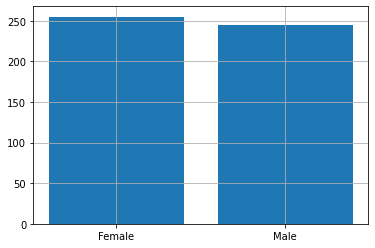

In [102]:
#Vẽ đồ thị thể hiện kết quả 
plt.bar(unique_gender.index, unique_gender.values)
plt.grid(True)

In [103]:
#Thống kê theo cân nặng
unique_weight = df_bmi['Weight_kg'].value_counts()
unique_weight

80     9
104    9
50     9
96     8
70     8
      ..
91     1
63     1
93     1
134    1
53     1
Name: Weight_kg, Length: 110, dtype: int64

In [ ]:
type(unique_weight)

<BarContainer object of 110 artists>

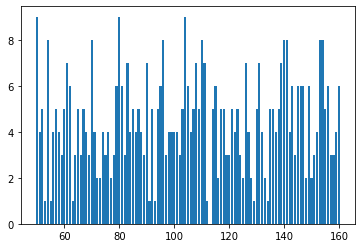

In [104]:
plt.bar(unique_weight.index,unique_weight.values)

# THỰC HÀNH 4:
---
**Yêu cầu 4.1:**
1. Đọc dữ liệu từ file Data_Excercise\Data_patient.csv vào biến kiểu dataframe: df_patient với cột feature_1 là cột chỉ số (index_col)
2. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result
    
 *Như yêu cầu đã thực hiện trong bài thực hành số 3*

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}







**Yêu cầu 4.2:**
Lọc dữ liệu trong df_patient thành các DataFrame:
    * df_male: chứa danh sách bệnh nhân Nam
    * df_female: chứa danh sách bệnh nhân nữ
    * df_no: danh sách những người không bị bệnh đau tim
    * df_yes: danh sách những người bị bệnh đau tim

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}







**Yêu cầu 4.3:**
Lọc trong df_patient dưa ra danh sách bệnh nhân thỏa mãn yêu cầu sau:
1. Những người bị mắc bệnh đau tim và trên 70 tuổi
2. Người có giới tính Female, có huyết áp trên 170 mmhg nhưng không bị bệnh đau tim.
3. Những người có triệu chứng đau ngực là Typical angina, giới tính Male và bị bệnh đau tim.

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}







**Yêu cầu 4.4:** Xác định:
1. Chỉ số huyết áp (Blood_pressure) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu
2. Chỉ số nhịp tim (Heartbeat) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu


In [ ]:
#{HỌC VIEN VIẾT CODE VÀO ĐÂY}







**Yêu cầu 4.5: Xác định:**
1. Số giá trị khác nhau của thuộc tính Type
2. Vẽ đồ thị dạng cột thể hiện kết quả thống kê số lượng theo từng giá trị khác nhau của thuộc tính Type


In [ ]:
#{HỌC VIEN VIẾT CODE VÀO ĐÂY}







## 9. Phân tích dữ liệu chuỗi thời gian (Time Series Data)
---
**Bài toán:**
* Người ta lắp đặt thiết bị để đếm số lượng xe đạp đi qua chiều phía đông và phía tây của cây cầu Fremont Bridge theo từng giờ.
* Chi tiết: https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k
----------------------
**Tập dữ liệu:**
* Tập dữ liệu là số lượng xe đạp đi qua cây cầu Fremont Bridge. Dữ liệu này được thu thập tự động thông qua các cảm biến ở 2 lối đi bộ ở phía đông và phía tây của cây cầu. Số lượng xe đạp được tổng hợp theo từng giờ.
* Tập dữ liệu bao gồm 4 cột:
    - Date: Thời gian (ngày - giờ): 10/03/2012 12:00:00 AM (Kiểu thời gian)
    - Fremont Bridge Total: Tổng số xe đi theo cả 2 lối đông và tây (Kiểu số nguyên)
    - Fremont Bridge East Sidewalk: Số xe đạp đi qua lối phía đông của cầu tương ứng với thời gian (Kiểu số nguyên)
    - Fremont Bridge West Sidewalk: Số xe đạp đi qua lối phía tây của cầu tương ứng với thời gian (Kiểu số nguyên)
-------------------------------
**Mục tiêu:**
1. Phân tích dữ liệu chuỗi thời gian (Time Series Data) sử dụng Pandas.
2. Kết hợp với các biểu đồ để tìm ra được những Insight ẩn chứa trong tập dữ liệu.


### 9.1) Đọc, quan sát và chuẩn hóa dữ liệu
---

In [ ]:
#Đọc dữ liệu trong file csv
path='Data_Excercise\Data_Bicycle_Counter.csv'
df_bicycle=pd.read_csv(path)
df_bicycle.info()

In [ ]:
df_bicycle.head()

In [ ]:
#Kiểm tra dữ liệu missing
df_bicycle.isnull().sum()

In [ ]:
#Liệt kê các thời điểm không có dữ liệu (Missing values)
df_bicycle[df_bicycle.isnull().any(axis=1)]

#hoặc
#df_bicycle[pd.isnull(df_bicycle['Total'])]

In [ ]:
# Đổi lại tên các cột cho ngắn gọn
df_bicycle.columns = ['Date','Total', 'East', 'West']
df_bicycle

In [ ]:
#Chuyển đổi dữ liệu cột Date về dạng chuỗi thời gian
df_bicycle['Date'] = pd.to_datetime(df_bicycle['Date'])
df_bicycle.info()

In [ ]:
#Thiết lập cột Date làm index cho DataFrame
df_bicycle.set_index('Date',inplace=True)
df_bicycle.head()

## 9.2) Khám phá tập dữ liệu
---
### A) Sử dụng các đặc trưng thống kê

In [ ]:
#Sử dụng sum tính tổng lượt người đi xe đạp
df_bicycle.sum()

In [ ]:
#Sử dụng describe để quan sát các thông số
df_bicycle.describe()

In [ ]:
#Thống kê số lượng xe đạp qua cầu phía West
w = df_bicycle['West'].value_counts()
print(w[:30])

In [ ]:
#Trực quan hóa số liệu thống kê
plt.bar(w.index,w.values)

In [ ]:
#Thống kê số lượng xe đạp qua cầu phía West
e = df_bicycle['East'].value_counts()
print(e[:30])

In [ ]:
#Trực quan hóa số liệu thống kê
plt.bar(e.index,e.values)

### Phát hiện 1:
----
1. Số lượng người đi xe đạp bên cầu phía West (8 344 494) cao hơn cầu phía East (6 997 333)
2. Lượng người đi qua từng bên cầu cao nhất theo giờ 850 lượt, toàn bộ 1097 lượt
3. Lượng người đi xe đạp qua cầu chủ yếu nhỏ dưới 30 lượt

### B) Phương pháp Phân tích chuỗi thời gian
---

### 1) Thống kê tổng số lượng đi xe đạp theo năm để thấy xu hướng chung

In [ ]:
df_bicycle.index

In [ ]:
#Dữ liệu bắt đầu từ 3/10/2012 --> 31/08/2020 
#Tách dữ liệu chỉ lấy từ năm 2013 - 2019
df_full_year = df_bicycle.loc['2013':'2019']
df_full_year.info()

In [ ]:
#Tổng hợp số liệu chuỗi thời gian theo từng năm
#Tính tổng số lượt qua cầu theo năm
yearly = df_full_year.resample('Y').sum() #Tính tổng theo năm
yearly

In [ ]:
#Trực quan hóa trên biểu đồ
yearly.plot(style=[':*', '--o', '-s'], color=['red','green','blue'])
plt.ylabel('Tổng số lượt qua cầu')
plt.xlabel('Năm')
plt.title('ĐỒ THỊ THỐNG KÊ SỐ LƯỢNG THEO NĂM')

### Phát hiện 2:Từ biểu đồ thống kê tổng số xe đạp qua cầu theo năm ta thấy:
---
* Số lượng người đi xe đạp qua cầu Fremont có xu hướng tăng lên theo từng năm, những năm gần đây tăng nhanh.
* Lượt xe đạp qua lối đi phía tây nhiều hơn lối đi phía đông, và cũng có xu hướng tăng nhanh trong những năng gần đây.

## 2) Thống kê số lượng người đi xe đạp theo tháng để thấy xu hướng mùa vụ
---

In [ ]:
#Thống kê số lượng xe theo tháng qua phía Đông, Tây và Toàn bộ
data_month = df_bicycle.resample('M').sum() #Tính tổng lượt đi theo tháng
data_month.plot(style=['-', '-', '-'], color=['red','green','blue'])
plt.ylabel('Số lượng xe đạp theo tháng');
plt.show()

In [ ]:
data_month

In [ ]:
#Hiển thị chi tiết dữ liệu theo tháng của một năm cụ thể [2019].
data_2019 = df_bicycle.loc['2019',['Total']]
df_month_19 = data_2019.resample('M').sum() #Tính tổng theo tháng
df_month_19.plot(marker='o', markersize='10', color='red')
plt.ylabel('Tổng số lượng xe theo từng tháng')
plt.title('THỐNG KÊ TỔNG SỐ LƯỢT XE ĐẠP THEO TỪNG THÁNG TRONG NĂM 2019',loc='center')
plt.grid()
plt.show()

### Phát hiện 3: Từ biểu đồ thể hiện lượng xe đạp qua cầu theo tháng ta thấy:
---
* Dữ liệu chuỗi thời gian có tính thời vụ (seasonal)
* Mọi người đạp xe nhiều hơn vào các tháng mùa hè và ít hơn vào các tháng mùa đông (4 tháng có số lượng người đạp xe nhiều nhất:5, 6, 7 và 8)

--> **Dữ liệu chuỗi thời gian về lượng xe đạp qua cầu có tính xu hướng (tăng dần) và tính thời vụ (số lượng nhiều hơn vào các tháng mùa hè và ít hơn vào các tháng mùa đông)**

## 3) Thống kê lượng đi xe đạp theo giờ
---

In [ ]:
#Tính trung bình lượng xe theo từng giờ qua cầu trong toàn bộ tập dữ liệu
by_time = df_bicycle.groupby(df_bicycle.index.time).mean()
by_time

In [ ]:
#Trực quan hóa dữ liệu:
hourly_ticks = 2 * 60 * 60 * np.arange(12)
by_time.plot(xticks=hourly_ticks, style=[':*', '--s', '-o'])
plt.grid()
plt.xlabel('Thời gian (h)')
plt.ylabel('Trung bình số xe qua cầu theo giờ')
plt.title('BIỂU ĐỒ THỂ HIỆN LƯỢNG XE TRUNG BÌNH QUA CẦU THEO TỪNG GIỜ',loc='center')
plt.show()

### Phát hiện 4: Từ biểu đồ thể hiện lượng xe đạp qua cầu trung bình theo giờ ta thấy:
---
* Lượng người đi xe đạp qua cầu chủ yếu tập trung vào thời điểm 7,8,9h buổi sáng | 16, 17, 18h buổi chiều
* Lượng người đi nhiều nhất vào thời điểm 8(h) sáng - 17h chiều.
* Thời điểm buổi sáng lượng người đi qua cầu làn phía Đông (East) Lớn hơn làn phía Tây (Đi từ bên ngoài bào trung tâm thành phố Seattle) | Buổi chiều lượng người đi qua cầu làn phía Tây (West) lơn hơn (đi ra khỏi trung tâm thành phố). 

### 4) Thống kê lượng xe trung bình theo ngày trong tuần
---

In [ ]:
#Nhóm dữ liệu theo ngày trong tuần và tính trung bình
df_weekday = df_bicycle.groupby(df_bicycle.index.dayofweek).mean()
#Đổi tên index theo ngày dễ quan sát
df_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday


In [ ]:
#Trực quan hóa dữ liệu lên đồ thị
stick =['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_weekday.plot(style=[':*', '--s', '-o']);
plt.grid()
plt.xlabel('Thứ trong tuần')
plt.ylabel('Trung bình theo ngày trong tuần')
plt.title('LƯỢNG XE TRUNG BÌNH QUA CẦU THEO TỪNG NGÀY TRONG TUẦN',loc='center')
plt.show()

In [ ]:
#Thực hiện thống kê số lượng người đi xe đạp qua cầu
#Tách giữa ngày làm việc [thứ 2 - thứ 5] và ngày cuối tuần [thứ 7, CN]
df_weekend = np.where(df_bicycle.index.weekday < 5, 'Weekday', 'Weekend')
#Tính lượng người đi qua trung bình theo giờ giữa các ngày trong tuần và cuối tuần
df_by_time = df_bicycle.groupby([df_weekend, df_bicycle.index.time]).mean()
df_by_time

In [ ]:
#Trực quan hóa dữ liệu
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df_by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':*', '--s', '-o'], grid=True)
df_by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':*', '--s', '-o'], grid=True);

### Phát hiện 5: Từ biểu đồ thể hiện lượng xe đạp qua cầu trung bình theo ngày trong tuần:
---
* Lượng người đi xe đạp qua cầu chủ yếu vào các ngày làm việc trong tuần [thứ 2 --> thứ 6]; Cuối tuần [Thứ 7, CN] lượng người đi qua cầu giảm đi đáng kể. Lượng người đi qua cầu ngày làm việc gấp đôi ngày cuối tuần.
* Vào các ngày làm việc trong tuần lượng người đi xe đạp qua cầu chủ yếu tập trung vào thời điểm 7,8,9h buổi sáng | 16, 17, 18h buổi chiều. Lượng người đi nhiều nhất vào thời điểm 8(h) sáng - 17h chiều.
* Vào các ngày cuối tuần, người đi xe đạp chủ yếu qua cầu trong thời gian từ 12-16h

## THỰC HÀNH 5
---
Dựa vào dữ liệu chuỗi thời gian quan trắc thông số nhiệt độ của Hà Giang và Cà Mau từ năm 2012 đến 2019 (Data_Temperature.csv), sử dụng các kỹ thuật để tìm ra những thông tin từ 2 bộ dữ liệu đó.

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}



